### Why Visualization is Important in SVM?

SVM is a **geometric algorithm**.
To understand SVM, we must visualize:
- Hyperplane
- Margin
- Support Vectors
- Effect of kernels
- Effect of C and Gamma

We will start with 2D (easy to see)
Then move to 3D (kernel intuition)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


In [76]:
X, y = make_circles(
    n_samples=300,
    noise=0.1,
    factor=0.2,
    random_state=42
)


In [86]:
print(X.ndim)

2


In [88]:
print(y.ndim)

1


What is happening internally?

| Parameter   | Meaning                                |
| ----------- | -------------------------------------- |
| `n_samples` | Total data points                      |
| `noise`     | Random disturbance (real-world effect) |
| `factor`    | Distance between inner & outer circle  |


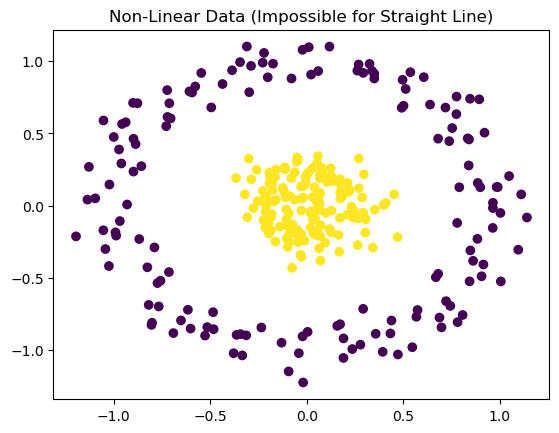

In [90]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Non-Linear Data (Impossible for Straight Line)")
plt.show()


#### APPLY LINEAR SVM (INTENTIONALLY FAIL)

In [92]:
from sklearn.svm import SVC

linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)


SVC(kernel='linear')

#### kernel='linear' means:

###### Model tries w·x + b = 0

###### A straight line in 2D

In [98]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

# model → trained SVM (SVC)
# X → input features (only 2 features, required for visualization)
# y → actual class labels
# We need 2 features because humans can see only 2D plots.
# X[:,0] → first feature (x-axis)
# X[:,1] → second feature (y-axis)
# We find: minimum value , maximum value
# Then we add padding (-1, +1) so plot doesn’t cut points.
# We are deciding the area of the graph we want to visualize.

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
#### What does this do?
### linspace creates 300 evenly spaced values
# meshgrid creates a 2D grid of points
# 👉 Imagine: Graph paper - Thousands of invisible points everywhere
# “We are creating a virtual map of the entire feature space.”
# if 
# x = [1, 2, 3]
# y = [4, 5]
    #  | (x,y) combinations  |
    #  | ------------------- |
   #  | (1,4), (2,4), (3,4) |
   # | (1,5), (2,5), (3,5) |




    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
## xx.ravel()
# Flattens grid into a 1D array
# np.c_[ ]
# Combines x & y values into (x, y) pairs
    # (x1, y1)
    # (x2, y2)
    #  (x3, y3).....
   
    Z = Z.reshape(xx.shape)
# Why?
# Predictions are flat
# Grid is 2D
# We reshape so each point maps back to its location
# This allows coloring the space correctly.

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.show()

# What this does:
# Fills regions with different colors
# Each color = predicted class
# This shows decision regions
# “This colored region is NOT data - this is the model’s belief.”

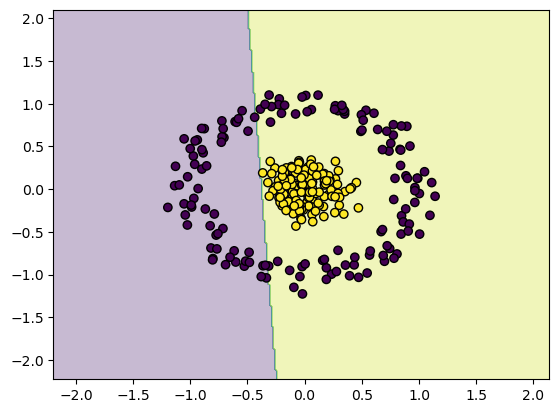

In [104]:
plot_decision_boundary(linear_svm, X, y)



- Boundary is forced straight

- Many misclassifications

- Margin meaningless here

**👉 Conclusion: Linear SVM is insufficient**

#### KERNEL TRICK – WHAT REALLY HAPPENS

**Kernel Trick does NOT magically curve the line.**

It does:
1. Transforms data to higher dimension
2. Finds a linear separator there
3. Maps result back to original space


### 3D VISUALIZATION (CORE INTUITION)

#### Feature Engineering for Visualization

In [108]:
# Create third feature manually
X_3d = np.c_[X, X[:,0]**2 + X[:,1]**2]


- New feature = radius²

- Circles become separable in 3D

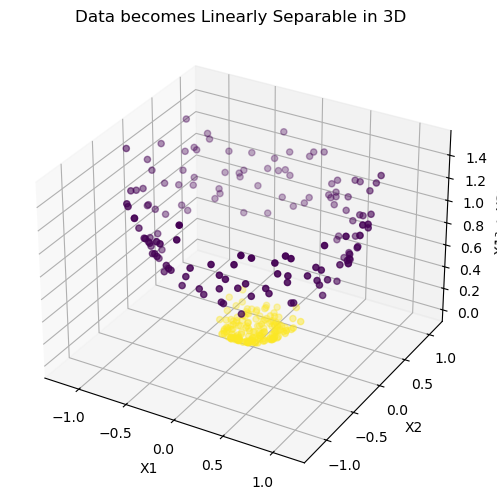

In [113]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_3d[:,0],
    X_3d[:,1],
    X_3d[:,2],
    c=y
)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X1² + X2²")
ax.set_title("Data becomes Linearly Separable in 3D")
plt.show()


##### RBF KERNEL

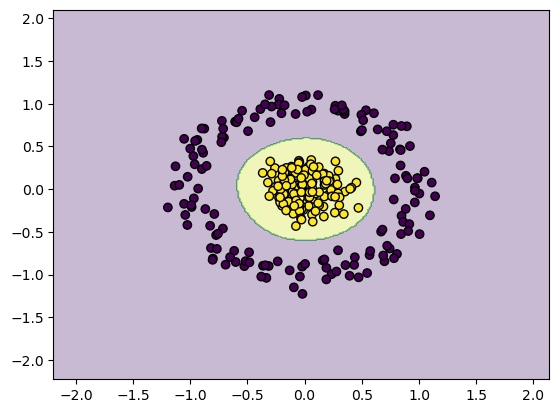

In [117]:
rbf_svm = SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X, y)

plot_decision_boundary(rbf_svm, X, y)


What RBF Kernel Does:

- Measures similarity using distance

- Creates localized influence regions

- Produces smooth curved boundary

**WHAT IS GAMMA?**

Gamma controls how far the influence of one data point reaches

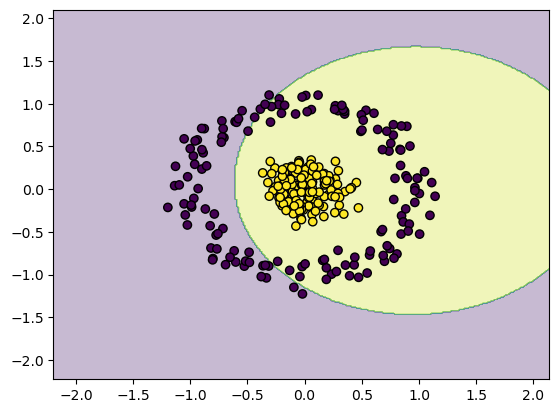

In [119]:
## Experimenting with low gamma 


rbf_low_gamma = SVC(kernel='rbf', gamma=0.01)
rbf_low_gamma.fit(X, y)

plot_decision_boundary(rbf_low_gamma, X, y)


Observation:

- Very smooth boundary

- Underfitting

- Distant points influence decision

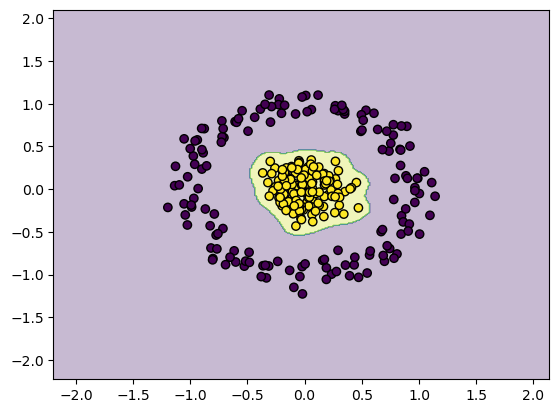

In [121]:
## Experiment with high gamma values 


rbf_high_gamma = SVC(kernel='rbf', gamma=60)
rbf_high_gamma.fit(X, y)

plot_decision_boundary(rbf_high_gamma, X, y)


Observation:

- Very wiggly boundary

- Overfitting

- Each point dominates locally

| Gamma | Meaning                   |
| ----- | ------------------------- |
| Low   | Far influence → smooth    |
| High  | Local influence → complex |


**WHAT IS C?(MARGIN CONTROL)**

C controls how strict SVM is about misclassification

##### LOW C (SOFT MARGIN)

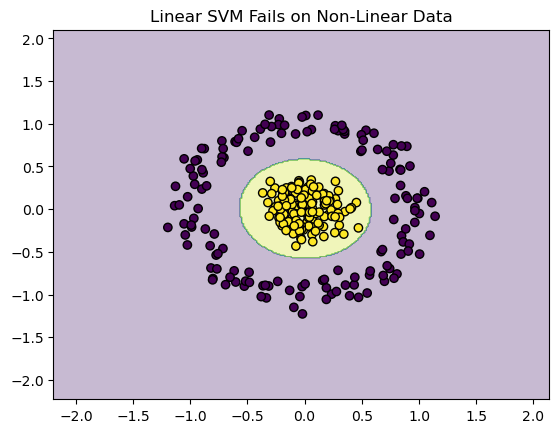

In [55]:
svm_low_c = SVC(kernel='rbf', C=0.1)
svm_low_c.fit(X, y)

plot_decision_boundary(svm_low_c, X, y)


Meaning:

- Allows misclassification

- Larger margin

- Underfitting risk

##### HIGH C (HARD MARGIN)

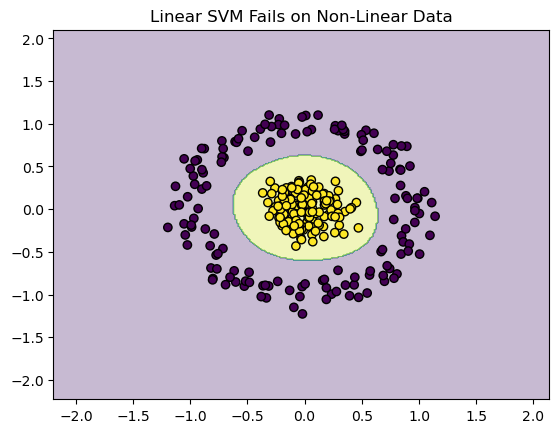

In [53]:
svm_high_c = SVC(kernel='rbf', C=100)
svm_high_c.fit(X, y)

plot_decision_boundary(svm_high_c, X, y)


Meaning:

- Penalizes errors heavily

- Smaller margin

- Overfitting risk

| C Value | Effect                      |
| ------- | --------------------------- |
| Low     | Wide margin, more errors    |
| High    | Narrow margin, fewer errors |


### POLYNOMIAL KERNEL

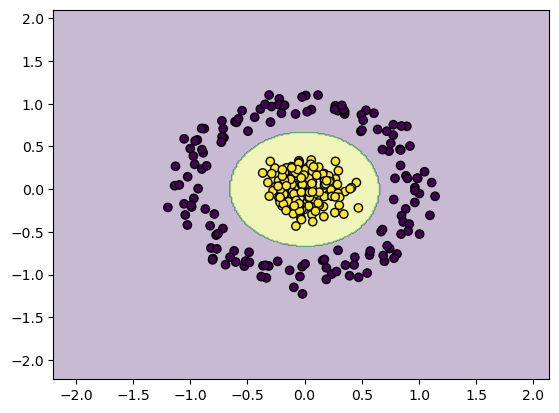

In [133]:
poly_svm = SVC(kernel='poly', degree=2)
poly_svm.fit(X, y)

plot_decision_boundary(poly_svm, X, y)


- Creates curved boundaries

- Degree controls complexity

- Higher degree → more complex

#### SIGMOID KERNEL

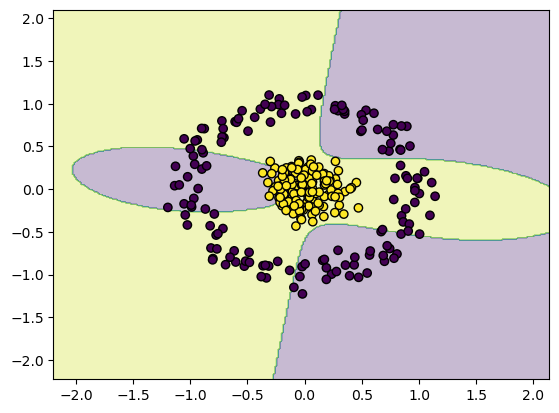

In [137]:
sigmoid_svm = SVC(kernel='sigmoid',degree=1)
sigmoid_svm.fit(X, y)

plot_decision_boundary(sigmoid_svm, X, y)


- Inspired by neural networks

- Rarely used in practice

- Can behave unpredictably

### Kernel Comparison Summary

- Linear → straight line
- Polynomial → curved (controlled)
- RBF → most flexible, most used
- Sigmoid → NN-like behavior
